In [15]:
from pathlib import Path
import numpy as np
from datasets import load_from_disk

LOTSA_PATH = "/data/Blob_EastUS/v-zhenwzhang/tsfm_datasets/lotsa_data"

In [36]:
dataset = load_from_disk(Path(LOTSA_PATH) / 'BEIJING_SUBWAY_30MIN')
print("Dataset: ", dataset)
print("Length of dataset: ", len(dataset))
print("Features: ")
for key in dataset.features:
    print(key, ": ", dataset.features[key])
for key, item in dataset[0].items():
    print(key, ": ", "Shape: " + str(np.array(item).shape) if isinstance(item, list) else item)

total_timestamps = 0
total_non_nan_timestamps = 0
for data in dataset:
    total_timestamps += np.array(data['target']).size

    target_array = np.array(data['target'])  # Convert the target to a NumPy array
    # Count non-NaN values
    non_nan_count = np.count_nonzero(~np.isnan(target_array))
    # Add to the total count
    total_non_nan_timestamps += non_nan_count
    # print(np.array(data['target']).shape)
print("Total timestamps: ", total_timestamps)
print("Total non-NaN timestamps: ", total_non_nan_timestamps)

Dataset:  Dataset({
    features: ['item_id', 'start', 'freq', 'target', 'past_feat_dynamic_real'],
    num_rows: 276
})
Length of dataset:  276
Features: 
item_id :  Value(dtype='string', id=None)
start :  Value(dtype='timestamp[s]', id=None)
freq :  Value(dtype='string', id=None)
target :  Sequence(feature=Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None), length=2, id=None)
past_feat_dynamic_real :  Sequence(feature=Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None), length=11, id=None)
item_id :  0
start :  2016-02-29 05:00:00
freq :  30T
target :  Shape: (2, 1572)
past_feat_dynamic_real :  Shape: (11, 1572)
Total timestamps:  867744
Total non-NaN timestamps:  496800


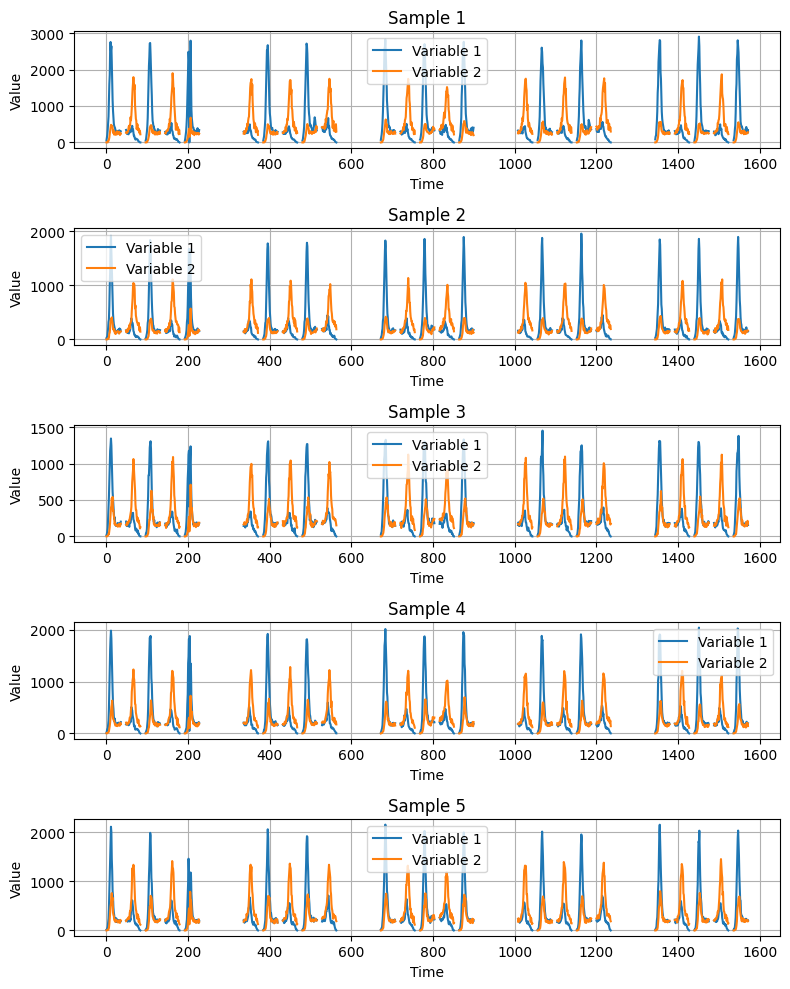

In [34]:
import matplotlib.pyplot as plt

# Create a figure with 5 subplots (one for each sample)
fig, axes = plt.subplots(5, 1, figsize=(8, 10))  # 5 rows, 1 column of subplots

# Loop through the first 5 data points
for i in range(5):  # Loop over the first 5 data points
    data = dataset[i]  # Get the data point
    target = np.array(data['target'])  # Convert the target to a NumPy array
    t = target.shape[1]  # Get the length of the time axis (T)

    # Create time axis for plotting
    time_axis = np.arange(t)
    
    # Plot both variables in the corresponding subplot
    axes[i].plot(time_axis, target[0, :], label='Variable 1')
    axes[i].plot(time_axis, target[1, :], label='Variable 2')

    axes[i].set_title(f'Sample {i + 1}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Value')
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout for better readability
plt.tight_layout()

# Show the combined plot
plt.show()

In [37]:
dataset = load_from_disk(Path(LOTSA_PATH) / 'uber_tlc_hourly')
print("Dataset: ", dataset)
print("Length of dataset: ", len(dataset))
print("Features: ")
for key in dataset.features:
    print(key, ": ", dataset.features[key])
for key, item in dataset[0].items():
    print(key, ": ", "Shape: " + str(np.array(item).shape) if isinstance(item, list) else item)

total_timestamps = 0
total_non_nan_timestamps = 0
for data in dataset:
    total_timestamps += np.array(data['target']).size

    target_array = np.array(data['target'])  # Convert the target to a NumPy array
    # Count non-NaN values
    non_nan_count = np.count_nonzero(~np.isnan(target_array))
    # Add to the total count
    total_non_nan_timestamps += non_nan_count
    # print(np.array(data['target']).shape)
print("Total timestamps: ", total_timestamps)
print("Total non-NaN timestamps: ", total_non_nan_timestamps)

Dataset:  Dataset({
    features: ['item_id', 'start', 'freq', 'target'],
    num_rows: 262
})
Length of dataset:  262
Features: 
item_id :  Value(dtype='string', id=None)
start :  Value(dtype='timestamp[s]', id=None)
freq :  Value(dtype='string', id=None)
target :  Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None)
item_id :  1
start :  2015-02-22 13:00:00
freq :  H
target :  Shape: (4278,)
Total timestamps:  1129444
Total non-NaN timestamps:  1129444


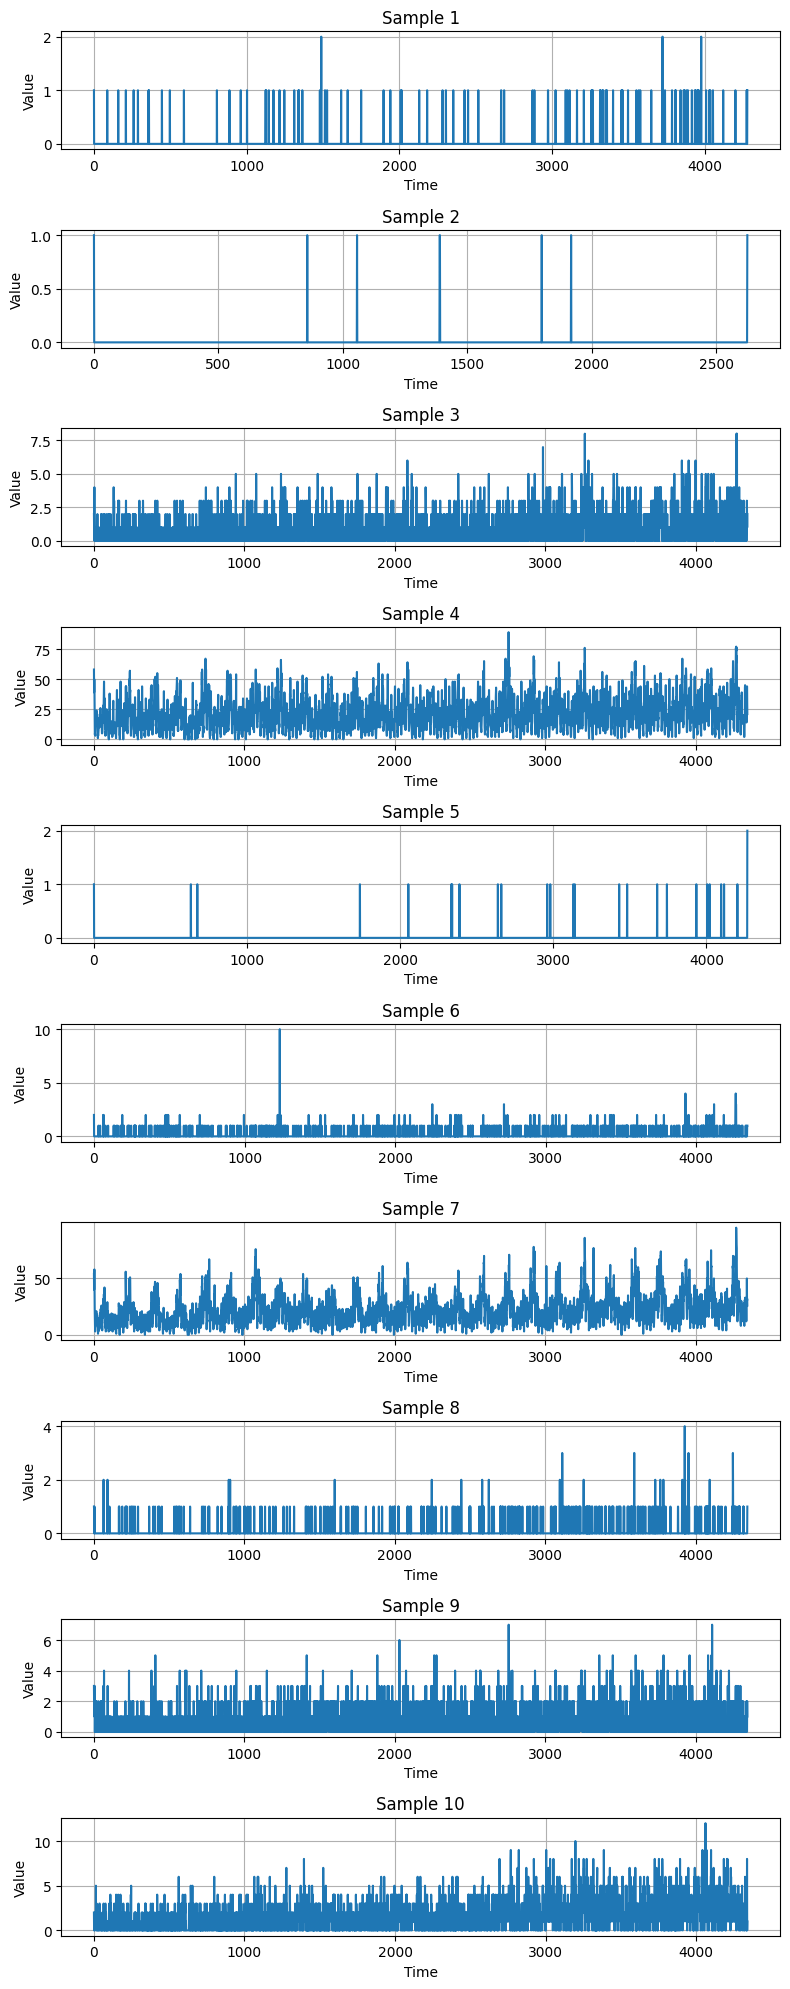

In [42]:
import matplotlib.pyplot as plt

samples = 10
# Create a figure with 5 subplots (one for each sample)
fig, axes = plt.subplots(samples, 1, figsize=(8, 20))  # 5 rows, 1 column of subplots

# Loop through the first 5 data points
for i in range(samples):  # Loop over the first 5 data points
    data = dataset[i]  # Get the data point
    target = np.array(data['target'])  # Convert the target to a NumPy array
    t = target.shape[0]  # Get the length of the time axis (T)

    # Create time axis for plotting
    time_axis = np.arange(t)
    
    # Plot both variables in the corresponding subplot
    axes[i].plot(time_axis, target[:])

    axes[i].set_title(f'Sample {i + 1}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Value')
    # axes[i].legend()
    axes[i].grid(True)

# Adjust layout for better readability
plt.tight_layout()

# Show the combined plot
plt.show()